# Gather

In [498]:
import pandas as pd
import numpy as np
import requests
import os
import tweepy
import json
from functools import reduce
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt
%matplotlib inline

In [499]:
df1 = pd.read_csv('twitter-archive-enhanced.csv') 
df1.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [500]:
t_ids = []
t_ids = df1.tweet_id

In [501]:
folder_name = 'image_predictions'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
    
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
response

<Response [200]>

In [502]:
with open(os.path.join(folder_name,
                       url.split('/')[-1]), mode = 'wb') as file:
    file.write(response.content)

In [503]:
os.listdir(folder_name)

['image-predictions.tsv']

In [504]:
df2 = pd.read_csv('image-predictions.tsv', sep = '\t') 
df2.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [505]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth)

additional_data = []

for ts in t_ids:
    try:
        tweet_ids = api.get_status(ts, tweet_mode='extended', wait_on_rate_limit = True,
                                   wait_on_rate_limit_notify = True)
        _json = tweet_ids._json
        retweet_count = tweet_ids.retweet_count
        favorite_count = tweet_ids.favorite_count
        additional_data.append({'tweet_id' : ts,
                               'retweet_count' : retweet_count,
                               'favorite_count' : favorite_count})
        with open('tweet_json.txt', 'w') as outfile:
            json.dump(_json, outfile)
        with open('tweet_json.txt', 'r') as json_file:
            _json = json.load(json_file)
    except Exception as e:
        print("Deleted ID " + str(e))

Deleted ID [{'code': 144, 'message': 'No status found with that ID.'}]
Deleted ID [{'code': 144, 'message': 'No status found with that ID.'}]
Deleted ID [{'code': 144, 'message': 'No status found with that ID.'}]
Deleted ID [{'code': 144, 'message': 'No status found with that ID.'}]
Deleted ID [{'code': 144, 'message': 'No status found with that ID.'}]
Deleted ID [{'code': 144, 'message': 'No status found with that ID.'}]
Deleted ID [{'code': 144, 'message': 'No status found with that ID.'}]
Deleted ID [{'code': 34, 'message': 'Sorry, that page does not exist.'}]
Deleted ID [{'code': 144, 'message': 'No status found with that ID.'}]
Deleted ID [{'code': 144, 'message': 'No status found with that ID.'}]
Deleted ID [{'code': 144, 'message': 'No status found with that ID.'}]
Rate limit reached. Sleeping for: 698
Rate limit reached. Sleeping for: 737


In [506]:
df = pd.DataFrame(additional_data, columns = ['tweet_id', 'retweet_count', 'favorite_count'])
df.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8664,39019
1,892177421306343426,6363,33420
2,891815181378084864,4226,25188
3,891689557279858688,8771,42391
4,891327558926688256,9543,40533


# Assess
### Detect

### Visual Assessment

In [507]:
df1

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [508]:
df2

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [509]:
df

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8664,39019
1,892177421306343426,6363,33420
2,891815181378084864,4226,25188
3,891689557279858688,8771,42391
4,891327558926688256,9543,40533
5,891087950875897856,3166,20338
6,890971913173991426,2109,11926
7,890729181411237888,19201,65951
8,890609185150312448,4327,27918
9,890240255349198849,7542,32135


### Programmatic Assessment

In [510]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [511]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [512]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2345 entries, 0 to 2344
Data columns (total 3 columns):
tweet_id          2345 non-null int64
retweet_count     2345 non-null int64
favorite_count    2345 non-null int64
dtypes: int64(3)
memory usage: 55.0 KB


In [513]:
all_columns = pd.Series(list(df1) + list(df2) + list(df))
all_columns[all_columns.duplicated()]

17    tweet_id
29    tweet_id
dtype: object

In [514]:
df1.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [515]:
df1.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [516]:
df1.name.value_counts()

None         745
a             55
Charlie       12
Lucy          11
Oliver        11
Cooper        11
Tucker        10
Lola          10
Penny         10
Winston        9
Bo             9
the            8
Sadie          8
Bailey         7
Buddy          7
Daisy          7
Toby           7
an             7
Dave           6
Oscar          6
Stanley        6
Milo           6
Scout          6
Jax            6
Bella          6
Jack           6
Rusty          6
Koda           6
Leo            6
George         5
            ... 
Norman         1
Mauve          1
Dante          1
Ole            1
Deacon         1
Traviss        1
Hubertson      1
Tango          1
Hazel          1
Ralphus        1
Skittle        1
Ginger         1
Clarq          1
Rover          1
Travis         1
Humphrey       1
Ulysses        1
Blakely        1
Spencer        1
Huxley         1
Bloop          1
Timber         1
Dale           1
Maisey         1
Coleman        1
Lance          1
Jimbo          1
Oreo          

In [517]:
df1[df1.name.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
12,889665388333682689,NaN,NaN,2017-07-25 01:55:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo that seems to be on the fence a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889665388...,13,10,None,None,None,None,puppo
23,887473957103951883,NaN,NaN,2017-07-19 00:47:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Canela. She attempted some fancy porch...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
24,887343217045368832,NaN,NaN,2017-07-18 16:08:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",You may not have known you needed to see this ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887343217...,13,10,None,None,None,None,None
25,887101392804085760,NaN,NaN,2017-07-18 00:07:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This... is a Jubilant Antarctic House Bear. We...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887101392...,12,10,None,None,None,None,None
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,19607400.0,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
35,885518971528720385,NaN,NaN,2017-07-13 15:19:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I have a new hero and his name is Howard. 14/1...,NaN,NaN,NaN,https://twitter.com/4bonds2carbon/status/88551...,14,10,None,None,None,None,None
37,885167619883638784,NaN,NaN,2017-07-12 16:03:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a corgi undercover as a malamute....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/885167619...,13,10,None,None,None,None,None
41,884441805382717440,NaN,NaN,2017-07-10 15:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...","I present to you, Pup in Hat. Pup in Hat is gr...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/884441805...,14,10,None,None,None,None,None


In [518]:
df1[df1.name == 'Emmy']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
76,878057613040115712,NaN,NaN,2017-06-23 01:10:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Emmy. She was adopted today. Massive r...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None


In [519]:
df1[df1.name == 'Canela']


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
23,887473957103951883,NaN,NaN,2017-07-19 00:47:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Canela. She attempted some fancy porch...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None


In [520]:
df1[df1.name == 'Shadow']


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None
75,878281511006478336,NaN,NaN,2017-06-23 16:00:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Shadow. In an attempt to reach maximum zo...,NaN,NaN,NaN,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None
593,798925684722855936,NaN,NaN,2016-11-16 16:28:21 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Shadow. He's a firm believer that they...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/798925684...,11,10,Shadow,None,None,None,None
1316,706644897839910912,NaN,NaN,2016-03-07 00:57:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Shadow. She's tired of the responsibiliti...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/706644897...,9,10,Shadow,None,None,None,None


In [521]:
df1[df1.name == 'Sierra']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
97,873337748698140672,NaN,NaN,2017-06-10 00:35:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Sierra. She's one preci...,8.732138e+17,4.196984e+09,2017-06-09 16:22:42 +0000,https://www.gofundme.com/help-my-baby-sierra-g...,12,10,Sierra,None,None,pupper,None
98,873213775632977920,NaN,NaN,2017-06-09 16:22:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sierra. She's one precious pupper. Abs...,NaN,NaN,NaN,https://www.gofundme.com/help-my-baby-sierra-g...,12,10,Sierra,None,None,pupper,None


### Document
#### Quality

- (1) In `df1`, 'timestamp' datatype is object.<br>
- (2) In `df1`, 'retweeted_status_timestamp' datatype is object.<br>
- (3) In `df1`, 'rating_numerator' has not all ratings correct.<br>
- (4) In `df1`, 'rating_denominator', all the denominators must be 10.<br> 
- (5) 'Emmy','Shadow', 'Sierra', 'Canela' records are duplicated.<br>
- (6) In `df1`, the 'name' column has some wrong names like a, an, the, this, quite, such, etc.<br>
- (7) In `df1`, 'in_reply_to_user_id' datatype is float.<br>
- (8) In `df1`, 'retweeted_status_user_id' datatype is float.<br>
- (9) In `df1`, sometimes 'retweeted_status_user_id' is 9 digits other times 10 digits.<br>
- (10) `retweet_count` & `favorite_count` are datatype float, `tweet_id`, `in_reply_to_status_id`, `retweeted_status_id` are datatype int/float.
- (11) There are some rows representing retweets.
- (12) One of the ratings are decimal like 9.5/10 (tweet_id = 681340665377193984) but is not printed likewise.
- Other is 13.5/10 (tweet_id = 883482846933004288) but is not printed likewise.

#### Tidiness

- (1) `df` and `df2` should be part of `df1`.<br>
- (2) The 'text' in `df1` contains the ratings and urls alongwith the text.<br>
- (3) There are multiple columns for one variable i.e. dog_stages.

# Clean

In [522]:
df1_clean_old = df1.copy()
df2_clean = df2.copy()
df_clean = df.copy()

## Tidiness

### -- Issue 1
- `df` and `df2` should be part of `df1`.

### Define
- Merge the *retweet_count* & *favorite_count* columns to the `df1` table, joining on *tweet_id*.

### Code

In [523]:
#df1_clean = pd.merge(df1_clean, df_clean,
 #                           on=['tweet_id'], how='left')

In [524]:
#df1_clean = pd.merge(df1_clean, df2_clean,
 #                           on=['tweet_id'], how='left')

In [525]:
dfs = [df1_clean_old, df_clean, df2_clean]

df1_clean = reduce(lambda left,right: pd.merge(left,right,on='tweet_id'), dfs)

### Test

In [526]:
df1_clean

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,...,1,Chesapeake_Bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",...,1,Appenzeller,0.341703,True,Border_collie,0.199287,True,ice_lolly,0.193548,False
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,...,2,Pomeranian,0.566142,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,...,1,Irish_terrier,0.487574,True,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,...,1,Pembroke,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True


In [527]:
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2069 entries, 0 to 2068
Data columns (total 30 columns):
tweet_id                      2069 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2069 non-null object
source                        2069 non-null object
text                          2069 non-null object
retweeted_status_id           75 non-null float64
retweeted_status_user_id      75 non-null float64
retweeted_status_timestamp    75 non-null object
expanded_urls                 2069 non-null object
rating_numerator              2069 non-null int64
rating_denominator            2069 non-null int64
name                          2069 non-null object
doggo                         2069 non-null object
floofer                       2069 non-null object
pupper                        2069 non-null object
puppo                         2069 non-null object
retweet_count                 2069 

### -- Issue 2
- The 'text' in `df1` contains the ratings and urls alongwith the text.

### Define
- The extra texts i.e. urls and ratings must be deleted which can be done by splitting the text using the split method.

### Code

In [528]:
df1_clean['text'] = df1_clean.text.str.split('1', expand = True)

### Test

In [529]:
df1_clean

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal.,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,...,1,Chesapeake_Bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",...,1,Appenzeller,0.341703,True,Border_collie,0.199287,True,ice_lolly,0.193548,False
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,...,2,Pomeranian,0.566142,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,...,1,Irish_terrier,0.487574,True,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,...,1,Pembroke,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True


### --Issue 3
- There are multiple columns (doggo, floofer, pupper, puppo) for one variable i.e. dog_stages.

### Define
- Replace the None strings by Nan then using the lambda functionality make multiple columns into column as `dog_stages`, drop the doggo, floofer, pupper, puppo columns.

### Code

In [530]:
df1_clean.doggo = df1_clean.doggo.replace('None',np.NaN)

In [531]:
df1_clean.floofer = df1_clean.floofer.replace('None',np.NaN)

In [532]:
df1_clean.pupper = df1_clean.pupper.replace('None',np.NaN)

In [533]:
df1_clean.puppo = df1_clean.puppo.replace('None',np.NaN)

In [534]:
df1_clean['dog_stages'] = df1_clean[df1_clean.columns[13:16]].apply(lambda x: ','.join(x.dropna().astype(str)),axis=1)

In [535]:
#df1_clean.drop(columns='doggo')
df1_clean = df1_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1)
#treatments_clean = treatments_clean.drop(['given_name', 'surname'], axis=1)

### Test

In [536]:
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2069 entries, 0 to 2068
Data columns (total 27 columns):
tweet_id                      2069 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2069 non-null object
source                        2069 non-null object
text                          2069 non-null object
retweeted_status_id           75 non-null float64
retweeted_status_user_id      75 non-null float64
retweeted_status_timestamp    75 non-null object
expanded_urls                 2069 non-null object
rating_numerator              2069 non-null int64
rating_denominator            2069 non-null int64
name                          2069 non-null object
retweet_count                 2069 non-null int64
favorite_count                2069 non-null int64
jpg_url                       2069 non-null object
img_num                       2069 non-null int64
p1                            2069 non

In [537]:
df1_clean.dog_stages

0             
1             
2             
3             
4             
5             
6             
7             
8             
9        doggo
10            
11            
12            
13            
14            
15            
16            
17            
18            
19            
20            
21            
22            
23            
24            
25            
26            
27            
28      pupper
29            
         ...  
2039          
2040          
2041          
2042          
2043          
2044          
2045          
2046          
2047          
2048          
2049          
2050          
2051          
2052          
2053          
2054          
2055          
2056          
2057          
2058          
2059          
2060          
2061          
2062          
2063          
2064          
2065          
2066          
2067          
2068          
Name: dog_stages, Length: 2069, dtype: object

In [538]:
df1_clean.dog_stages = df1_clean.dog_stages.replace(np.NaN, 'None')

In [539]:
df1_clean.dog_stages

0             
1             
2             
3             
4             
5             
6             
7             
8             
9        doggo
10            
11            
12            
13            
14            
15            
16            
17            
18            
19            
20            
21            
22            
23            
24            
25            
26            
27            
28      pupper
29            
         ...  
2039          
2040          
2041          
2042          
2043          
2044          
2045          
2046          
2047          
2048          
2049          
2050          
2051          
2052          
2053          
2054          
2055          
2056          
2057          
2058          
2059          
2060          
2061          
2062          
2063          
2064          
2065          
2066          
2067          
2068          
Name: dog_stages, Length: 2069, dtype: object

## Quality

### -- Issue 1
- In df1, 'timestamp' datatype is object.

### Define
- Change the datatype of `timestamp` to datetime using `pd.to_datetime`.

### Code 

In [540]:
df1_clean['timestamp'] =  pd.to_datetime(df1_clean['timestamp'])

### Test

In [541]:
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2069 entries, 0 to 2068
Data columns (total 27 columns):
tweet_id                      2069 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2069 non-null datetime64[ns]
source                        2069 non-null object
text                          2069 non-null object
retweeted_status_id           75 non-null float64
retweeted_status_user_id      75 non-null float64
retweeted_status_timestamp    75 non-null object
expanded_urls                 2069 non-null object
rating_numerator              2069 non-null int64
rating_denominator            2069 non-null int64
name                          2069 non-null object
retweet_count                 2069 non-null int64
favorite_count                2069 non-null int64
jpg_url                       2069 non-null object
img_num                       2069 non-null int64
p1                            

In [542]:
df1_clean

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stages
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal.,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,...,Chesapeake_Bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False,
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",...,Appenzeller,0.341703,True,Border_collie,0.199287,True,ice_lolly,0.193548,False,
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,...,Pomeranian,0.566142,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True,
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,...,Irish_terrier,0.487574,True,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True,
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,...,Pembroke,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True,doggo


### -- Issue 2
- In df1, 'retweeted_status_timestamp' datatype is object.

### Define
- Change the datatype of `retweeted_status_timestamp` to datetime using `pd.to_datetime`.

### Code

In [543]:
df1_clean['retweeted_status_timestamp'] =  pd.to_datetime(df1_clean['retweeted_status_timestamp'])

### Test

In [544]:
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2069 entries, 0 to 2068
Data columns (total 27 columns):
tweet_id                      2069 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2069 non-null datetime64[ns]
source                        2069 non-null object
text                          2069 non-null object
retweeted_status_id           75 non-null float64
retweeted_status_user_id      75 non-null float64
retweeted_status_timestamp    75 non-null datetime64[ns]
expanded_urls                 2069 non-null object
rating_numerator              2069 non-null int64
rating_denominator            2069 non-null int64
name                          2069 non-null object
retweet_count                 2069 non-null int64
favorite_count                2069 non-null int64
jpg_url                       2069 non-null object
img_num                       2069 non-null int64
p1                    

### -- Issue 3
- In df1, 'rating_numerator' has not all ratings correct.

### Define
 - Change the values in rating_numerator to appropriate values by visual and programmatic assessment using `pandas.DataFrame.replace`.

### Code

In [545]:
df1_clean.rating_numerator = df1_clean.rating_numerator.replace([420,24,44,84,144,143], 14)

df1_clean.rating_numerator = df1_clean.rating_numerator.replace([26,60,165,666], 16)

df1_clean.rating_numerator = df1_clean.rating_numerator.replace([80,88,182], 18)

df1_clean.rating_numerator = df1_clean.rating_numerator.replace([1776, 27], 17)

df1_clean.rating_numerator = df1_clean.rating_numerator.replace([20,121,204], 12)

df1_clean.rating_numerator = df1_clean.rating_numerator.replace([420,24,44,84,144,143], 14)

df1_clean.rating_numerator = df1_clean.rating_numerator.replace([50, 45], 15)

df1_clean.rating_numerator = df1_clean.rating_numerator.replace([960,99], 9)

df1_clean.rating_numerator = df1_clean.rating_numerator.replace([0, 75], 10)

### Test

In [546]:
df1_clean.rating_numerator.value_counts()

12    476
10    432
11    413
13    280
9     152
8      95
7      52
14     44
5      34
6      32
3      19
4      16
2       9
1       5
15      3
16      3
17      2
18      2
Name: rating_numerator, dtype: int64

### -- Issue 4
- In df1, 'rating_denominator', all the denominators must be 10.

### Define
- Change all the values in rating_denominator to 10 using `pandas.DataFrame.replace`.

### Code

In [547]:
df1_clean.rating_denominator = df1_clean.rating_denominator.replace([11,50,80,20,2,16,40,
                                                                     70,15,90,110,120,130,150,170,7,0], 10)

### Test

In [548]:
df1_clean.rating_denominator.value_counts()

10    2069
Name: rating_denominator, dtype: int64

### -- Issue 5
- 'Emmy','Shadow', 'Sierra', 'Canela' records are duplicated.

### Define
- Remove such multiple records from the table so that consistency issues will be avoided. This can be achieved by making a different dataframe holding all the names as "None" because we want to keep these rows with "None" in our final dataset. Then dropping the duplicates and storing them in new one, followed by removing the single remaining row with name = "None". Then appending the datframe containing all the name="None" rows with the newly made dataframe.

### Code

In [549]:
df1_none = df1_clean[df1_clean.name == 'None']
df1_none

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stages
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891087950...,...,Chesapeake_Bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False,
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/890729181...,...,Pomeranian,0.566142,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True,
12,889665388333682689,NaN,NaN,2017-07-25 01:55:32,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo that seems to be on the fence a...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/889665388...,...,Pembroke,0.966327,True,Cardigan,0.027356,True,basenji,0.004633,True,
23,887343217045368832,NaN,NaN,2017-07-18 16:08:03,"<a href=""http://twitter.com/download/iphone"" r...",You may not have known you needed to see this ...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/887343217...,...,Mexican_hairless,0.330741,True,sea_lion,0.275645,False,Weimaraner,0.134203,True,
24,887101392804085760,NaN,NaN,2017-07-18 00:07:08,"<a href=""http://twitter.com/download/iphone"" r...",This... is a Jubilant Antarctic House Bear. We...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/887101392...,...,Samoyed,0.733942,True,Eskimo_dog,0.035029,True,Staffordshire_bullterrier,0.029705,True,
33,885167619883638784,NaN,NaN,2017-07-12 16:03:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a corgi undercover as a malamute....,NaN,NaN,NaT,https://twitter.com/dog_rates/status/885167619...,...,malamute,0.812482,True,Siberian_husky,0.071712,True,Eskimo_dog,0.055770,True,
37,884441805382717440,NaN,NaN,2017-07-10 15:58:53,"<a href=""http://twitter.com/download/iphone"" r...","I present to you, Pup in Hat. Pup in Hat is gr...",NaN,NaN,NaT,https://twitter.com/dog_rates/status/884441805...,...,Pembroke,0.993225,True,Cardigan,0.003216,True,Chihuahua,0.002081,True,
42,883117836046086144,NaN,NaN,2017-07-07 00:17:54,"<a href=""http://twitter.com/download/iphone"" r...",Please only send dogs. We don't rate mechanics...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/883117836...,...,golden_retriever,0.949562,True,Labrador_retriever,0.045948,True,kuvasz,0.002471,True,
53,880872448815771648,NaN,NaN,2017-06-30 19:35:32,"<a href=""http://twitter.com/download/iphone"" r...",Ugh not again. We only rate dogs. Please don't...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/880872448...,...,Pembroke,0.791416,True,Norwich_terrier,0.061393,True,Chihuahua,0.033726,True,
56,880095782870896641,NaN,NaN,2017-06-28 16:09:20,"<a href=""http://twitter.com/download/iphone"" r...",Please don't send in photos without dogs in th...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/880095782...,...,miniature_pinscher,0.120298,True,Rhodesian_ridgeback,0.106395,True,beagle,0.106073,True,


In [550]:
df1_clean_new = df1_clean[~((df1_clean.name.duplicated()) & df1_clean.name.notnull())]
df1_clean_new

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stages
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892420643...,...,orange,0.097049,False,bagel,8.585110e-02,False,banana,7.611000e-02,False,
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892177421...,...,Chihuahua,0.323581,True,Pekinese,9.064650e-02,True,papillon,6.895690e-02,True,
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891815181...,...,Chihuahua,0.716012,True,malamute,7.825300e-02,True,kelpie,3.137890e-02,True,
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal.,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891689557...,...,paper_towel,0.170278,False,Labrador_retriever,1.680860e-01,True,spatula,4.083590e-02,False,
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891327558...,...,basset,0.555712,True,English_springer,2.257700e-01,True,German_short-haired_pointer,1.752190e-01,True,
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891087950...,...,Chesapeake_Bay_retriever,0.425595,True,Irish_terrier,1.163170e-01,True,Indian_elephant,7.690220e-02,False,
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaT,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",...,Appenzeller,0.341703,True,Border_collie,1.992870e-01,True,ice_lolly,1.935480e-01,False,
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/890609185...,...,Irish_terrier,0.487574,True,Irish_setter,1.930540e-01,True,Chesapeake_Bay_retriever,1.181840e-01,True,
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/890240255...,...,Pembroke,0.511319,True,Cardigan,4.510380e-01,True,Chihuahua,2.924820e-02,True,doggo
10,890006608113172480,NaN,NaN,2017-07-26 00:31:25,"<a href=""http://twitter.com/download/iphone"" r...",This is Koda. He is a South Australian decksha...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/890006608...,...,Samoyed,0.957979,True,Pomeranian,1.388350e-02,True,chow,8.167480e-03,True,


In [551]:
df1_clean_new = df1_clean_new[df1_clean_new.name != 'None']

In [552]:
df1_clean_new = df1_clean_new.append(df1_none) 

### Test

In [553]:
df1_clean_new[df1_clean_new.name == 'Emmy']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stages
65,878057613040115712,NaN,NaN,2017-06-23 01:10:23,"<a href=""http://twitter.com/download/iphone"" r...",This is Emmy. She was adopted today. Massive r...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/878057613...,...,French_bulldog,0.839097,True,Boston_bull,0.078799,True,toy_terrier,0.015243,True,


In [554]:
df1_clean_new[df1_clean_new.name == 'Canela']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stages
22,887473957103951883,NaN,NaN,2017-07-19 00:47:34,"<a href=""http://twitter.com/download/iphone"" r...",This is Canela. She attempted some fancy porch...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/887473957...,...,Pembroke,0.809197,True,Rhodesian_ridgeback,0.05495,True,beagle,0.038915,True,


In [555]:
df1_clean_new[df1_clean_new.name == 'Shadow']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stages
64,878281511006478336,NaN,NaN,2017-06-23 16:00:04,"<a href=""http://twitter.com/download/iphone"" r...",Meet Shadow. In an attempt to reach maximum zo...,NaN,NaN,NaT,"https://www.gofundme.com/3yd6y1c,https://twitt...",...,basset,0.32042,True,collie,0.215975,True,Appenzeller,0.128507,True,


In [556]:
df1_clean_new[df1_clean_new.name == 'Sierra']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stages
82,873213775632977920,NaN,NaN,2017-06-09 16:22:42,"<a href=""http://twitter.com/download/iphone"" r...",This is Sierra. She's one precious pupper. Abs...,NaN,NaN,NaT,https://www.gofundme.com/help-my-baby-sierra-g...,...,vizsla,0.619782,True,bloodhound,0.338069,True,Chesapeake_Bay_retriever,0.012676,True,pupper


In [557]:
df1_clean_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1510 entries, 0 to 2068
Data columns (total 27 columns):
tweet_id                      1510 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     1510 non-null datetime64[ns]
source                        1510 non-null object
text                          1510 non-null object
retweeted_status_id           63 non-null float64
retweeted_status_user_id      63 non-null float64
retweeted_status_timestamp    63 non-null datetime64[ns]
expanded_urls                 1510 non-null object
rating_numerator              1510 non-null int64
rating_denominator            1510 non-null int64
name                          1510 non-null object
retweet_count                 1510 non-null int64
favorite_count                1510 non-null int64
jpg_url                       1510 non-null object
img_num                       1510 non-null int64
p1                    

In [558]:
df1_clean_new

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stages
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892420643...,...,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892177421...,...,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891815181...,...,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal.,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891689557...,...,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891327558...,...,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaT,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",...,Appenzeller,0.341703,True,Border_collie,0.199287,True,ice_lolly,0.193548,False,
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/890609185...,...,Irish_terrier,0.487574,True,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True,
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/890240255...,...,Pembroke,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True,doggo
10,890006608113172480,NaN,NaN,2017-07-26 00:31:25,"<a href=""http://twitter.com/download/iphone"" r...",This is Koda. He is a South Australian decksha...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/890006608...,...,Samoyed,0.957979,True,Pomeranian,0.013884,True,chow,0.008167,True,
11,889880896479866881,NaN,NaN,2017-07-25 16:11:53,"<a href=""http://twitter.com/download/iphone"" r...",This is Bruno. He is a service shark. Only get...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/889880896...,...,French_bulldog,0.377417,True,Labrador_retriever,0.151317,True,muzzle,0.082981,False,


### -- Issue 6
- In df1, the 'name' column has some wrong names like a, an, the, this, quite, such, etc.

### Define
- Change such columns with these names by 'None' using the replace method.

### Code

In [559]:
df1_clean_new.name = df1_clean_new.name.replace(['a','an','the','this','quite','such','all'], 'None')

### Test

In [560]:
df1_clean_new.name.value_counts()

None          582
Sully           1
Charlie         1
Leonard         1
Zoey            1
Brody           1
Bobby           1
Koda            1
Devón           1
Danny           1
Chipson         1
Lizzie          1
Samsom          1
Kirk            1
Meyer           1
Archie          1
Ike             1
Dwight          1
Beya            1
Kingsley        1
Bertson         1
Wesley          1
Ted             1
Leo             1
Pavlov          1
Reese           1
Yoda            1
Aldrick         1
Ralphie         1
Levi            1
             ... 
incredibly      1
Sora            1
Klevin          1
Toby            1
Shadoe          1
Keet            1
Edd             1
Jeremy          1
Misty           1
Jaspers         1
Moose           1
Sobe            1
Aja             1
Jiminus         1
Chuckles        1
Davey           1
Dixie           1
Josep           1
Stubert         1
Suki            1
Indie           1
Max             1
Malikai         1
Hanz            1
Kody      

### -- Issue 7
- In df1, 'in_reply_to_user_id' datatype is float.

### Define
- The datatype can be changed to 'object' using the `astype` method.

### Code

In [561]:
df1_clean_new.in_reply_to_user_id = df1_clean_new.in_reply_to_user_id.astype(str)

### Test

In [562]:
df1_clean_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1510 entries, 0 to 2068
Data columns (total 27 columns):
tweet_id                      1510 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           1510 non-null object
timestamp                     1510 non-null datetime64[ns]
source                        1510 non-null object
text                          1510 non-null object
retweeted_status_id           63 non-null float64
retweeted_status_user_id      63 non-null float64
retweeted_status_timestamp    63 non-null datetime64[ns]
expanded_urls                 1510 non-null object
rating_numerator              1510 non-null int64
rating_denominator            1510 non-null int64
name                          1510 non-null object
retweet_count                 1510 non-null int64
favorite_count                1510 non-null int64
jpg_url                       1510 non-null object
img_num                       1510 non-null int64
p1                   

### -- Issues 8 & 9
- In df1, 'retweeted_status_user_id' datatype is float.<br>
- In df1, sometimes 'retweeted_status_user_id' is 9 digits other times 10 digits.

### Define
- Convert the retweeted_status_user_id column's data type from a float to a string using astype, remove the '.0' using string slicing, and pad 9-digit retweeted_status_user_id with a leading 0.

### Code

In [563]:
df1_clean_new.retweeted_status_user_id = df1_clean_new.retweeted_status_user_id.astype(str).str[:-2].str.pad(10, fillchar='0')
# Reconvert NaNs entries that were converted to '0000n' by code above
df1_clean_new.retweeted_status_user_id = df1_clean_new.retweeted_status_user_id.replace('000000000n', np.nan)

### Test

In [564]:
df1_clean_new.retweeted_status_user_id

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
6              NaN
8              NaN
9              NaN
10             NaN
11             NaN
13             NaN
14             NaN
15             NaN
16             NaN
17             NaN
18             NaN
19             NaN
20             NaN
21             NaN
22             NaN
25             NaN
26             NaN
27             NaN
28             NaN
29             NaN
30             NaN
31             NaN
32      4196983835
34             NaN
35             NaN
           ...    
2002           NaN
2008           NaN
2012           NaN
2014           NaN
2018           NaN
2019           NaN
2020           NaN
2023           NaN
2029           NaN
2033           NaN
2034           NaN
2035           NaN
2036           NaN
2037           NaN
2041           NaN
2042           NaN
2043           NaN
2044           NaN
2045           NaN
2049           NaN
2050           NaN
2051        

In [565]:
df1_clean_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1510 entries, 0 to 2068
Data columns (total 27 columns):
tweet_id                      1510 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           1510 non-null object
timestamp                     1510 non-null datetime64[ns]
source                        1510 non-null object
text                          1510 non-null object
retweeted_status_id           63 non-null float64
retweeted_status_user_id      63 non-null object
retweeted_status_timestamp    63 non-null datetime64[ns]
expanded_urls                 1510 non-null object
rating_numerator              1510 non-null int64
rating_denominator            1510 non-null int64
name                          1510 non-null object
retweet_count                 1510 non-null int64
favorite_count                1510 non-null int64
jpg_url                       1510 non-null object
img_num                       1510 non-null int64
p1                    

### -- Issue 10
- `retweet_count` & `favorite_count` are datatype float, `tweet_id`, `in_reply_to_status_id`, `retweeted_status_id` are datatype int/float.

### Define
- Convert these to datatype 'object' using the `astype` method.

### Code

In [566]:
df1_clean_new.tweet_id = df1_clean_new.tweet_id.astype(str).str.strip('.0')

In [567]:
df1_clean_new.in_reply_to_status_id = df1_clean_new.in_reply_to_status_id.astype(str).str.strip('.0')

In [568]:
df1_clean_new.retweeted_status_id = df1_clean_new.retweeted_status_id.astype(str).str.strip('.0')

In [569]:
df1_clean_new.retweet_count = df1_clean_new.retweet_count.astype(str).str.strip('.0')

In [570]:
df1_clean_new.favorite_count = df1_clean_new.favorite_count.astype(str).str.strip('.0')

In [571]:
df1_clean_new.img_num = df1_clean_new.img_num.astype(str).str.strip('.0')

### Test

In [572]:
df1_clean_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1510 entries, 0 to 2068
Data columns (total 27 columns):
tweet_id                      1510 non-null object
in_reply_to_status_id         1510 non-null object
in_reply_to_user_id           1510 non-null object
timestamp                     1510 non-null datetime64[ns]
source                        1510 non-null object
text                          1510 non-null object
retweeted_status_id           1510 non-null object
retweeted_status_user_id      63 non-null object
retweeted_status_timestamp    63 non-null datetime64[ns]
expanded_urls                 1510 non-null object
rating_numerator              1510 non-null int64
rating_denominator            1510 non-null int64
name                          1510 non-null object
retweet_count                 1510 non-null object
favorite_count                1510 non-null object
jpg_url                       1510 non-null object
img_num                       1510 non-null object
p1              

In [573]:
df1_clean_new

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stages
0,892420643555336193,nan,nan,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,nan,NaN,NaT,https://twitter.com/dog_rates/status/892420643...,...,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,
1,892177421306343426,nan,nan,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,nan,NaN,NaT,https://twitter.com/dog_rates/status/892177421...,...,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,
2,891815181378084864,nan,nan,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,nan,NaN,NaT,https://twitter.com/dog_rates/status/891815181...,...,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,
3,891689557279858688,nan,nan,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal.,nan,NaN,NaT,https://twitter.com/dog_rates/status/891689557...,...,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,
4,891327558926688256,nan,nan,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,nan,NaN,NaT,https://twitter.com/dog_rates/status/891327558...,...,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,
6,890971913173991426,nan,nan,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,nan,NaN,NaT,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",...,Appenzeller,0.341703,True,Border_collie,0.199287,True,ice_lolly,0.193548,False,
8,890609185150312448,nan,nan,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,nan,NaN,NaT,https://twitter.com/dog_rates/status/890609185...,...,Irish_terrier,0.487574,True,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True,
9,890240255349198849,nan,nan,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,nan,NaN,NaT,https://twitter.com/dog_rates/status/890240255...,...,Pembroke,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True,doggo
10,89000660811317248,nan,nan,2017-07-26 00:31:25,"<a href=""http://twitter.com/download/iphone"" r...",This is Koda. He is a South Australian decksha...,nan,NaN,NaT,https://twitter.com/dog_rates/status/890006608...,...,Samoyed,0.957979,True,Pomeranian,0.013884,True,chow,0.008167,True,
11,889880896479866881,nan,nan,2017-07-25 16:11:53,"<a href=""http://twitter.com/download/iphone"" r...",This is Bruno. He is a service shark. Only get...,nan,NaN,NaT,https://twitter.com/dog_rates/status/889880896...,...,French_bulldog,0.377417,True,Labrador_retriever,0.151317,True,muzzle,0.082981,False,


### -- Issue 11
- There are some rows representing retweets.

### Define
- Drop all the rows containing `retweeted_status_id` so that no records representing retweets will be present.

### Code

In [574]:
df1_clean_new = df1_clean_new[df1_clean_new.retweeted_status_user_id != np.NaN]

### Test

In [575]:
df1_clean_new

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stages
0,892420643555336193,nan,nan,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,nan,NaN,NaT,https://twitter.com/dog_rates/status/892420643...,...,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,
1,892177421306343426,nan,nan,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,nan,NaN,NaT,https://twitter.com/dog_rates/status/892177421...,...,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,
2,891815181378084864,nan,nan,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,nan,NaN,NaT,https://twitter.com/dog_rates/status/891815181...,...,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,
3,891689557279858688,nan,nan,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal.,nan,NaN,NaT,https://twitter.com/dog_rates/status/891689557...,...,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,
4,891327558926688256,nan,nan,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,nan,NaN,NaT,https://twitter.com/dog_rates/status/891327558...,...,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,
6,890971913173991426,nan,nan,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,nan,NaN,NaT,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",...,Appenzeller,0.341703,True,Border_collie,0.199287,True,ice_lolly,0.193548,False,
8,890609185150312448,nan,nan,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,nan,NaN,NaT,https://twitter.com/dog_rates/status/890609185...,...,Irish_terrier,0.487574,True,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True,
9,890240255349198849,nan,nan,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,nan,NaN,NaT,https://twitter.com/dog_rates/status/890240255...,...,Pembroke,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True,doggo
10,89000660811317248,nan,nan,2017-07-26 00:31:25,"<a href=""http://twitter.com/download/iphone"" r...",This is Koda. He is a South Australian decksha...,nan,NaN,NaT,https://twitter.com/dog_rates/status/890006608...,...,Samoyed,0.957979,True,Pomeranian,0.013884,True,chow,0.008167,True,
11,889880896479866881,nan,nan,2017-07-25 16:11:53,"<a href=""http://twitter.com/download/iphone"" r...",This is Bruno. He is a service shark. Only get...,nan,NaN,NaT,https://twitter.com/dog_rates/status/889880896...,...,French_bulldog,0.377417,True,Labrador_retriever,0.151317,True,muzzle,0.082981,False,


In [576]:
df1_clean_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1510 entries, 0 to 2068
Data columns (total 27 columns):
tweet_id                      1510 non-null object
in_reply_to_status_id         1510 non-null object
in_reply_to_user_id           1510 non-null object
timestamp                     1510 non-null datetime64[ns]
source                        1510 non-null object
text                          1510 non-null object
retweeted_status_id           1510 non-null object
retweeted_status_user_id      63 non-null object
retweeted_status_timestamp    63 non-null datetime64[ns]
expanded_urls                 1510 non-null object
rating_numerator              1510 non-null int64
rating_denominator            1510 non-null int64
name                          1510 non-null object
retweet_count                 1510 non-null object
favorite_count                1510 non-null object
jpg_url                       1510 non-null object
img_num                       1510 non-null object
p1              

### -- Issue 12
- One of the ratings are decimal like 9.5/10 (tweet_id = 681340665377193984) but is not printed likewise.
- Other is 13.5/10 (tweet_id = 883482846933004288) but is not printed likewise.

### Define
- We can use the indexing techniques. `mask` helps you to select the row in which df1_clean_new.tweet_id = 681340665377193984 is True, while df.loc[mask, column_name] = 9 sets the value 9 to the selected rows where mask holds in the column which name is column_name which we can put as the rating_numerator. Same method applies to the next issue.

### Code

In [578]:
#df1_clean.rating_numerator = df1_clean.rating_numerator.replace([0, 75], 10)
mask = df1_clean_new.tweet_id = 681340665377193984
column_name = 'rating_numerator'
df.loc[mask, column_name] = 9



In [579]:
mask1 = df1_clean_new.tweet_id = 883482846933004288
column_name = 'rating_numerator'
df.loc[mask, column_name] = 13

### Test

In [580]:
df1_clean_new.rating_numerator.value_counts()

12    360
10    312
11    286
13    231
9      94
8      61
14     39
7      33
5      27
6      24
3      14
4      11
2       6
1       4
15      3
16      2
18      2
17      1
Name: rating_numerator, dtype: int64

# Storing

In [581]:
df1_clean_new.to_csv('twitter_archive_master.csv', index = False)

In [582]:
df1_clean_new = pd.read_csv('twitter_archive_master.csv') 

# Analyzing & Visualising

## Insight (1)
- From the cleaned dataset, we can check the which dog has the most retweet_count i.e. the most retweeted dog.

In [583]:
df1_clean_new.loc[df1_clean_new['retweet_count'].idxmax()]

tweet_id                                                     883482846933004288
in_reply_to_status_id                                                       NaN
in_reply_to_user_id                                                         NaN
timestamp                                                   2016-06-18 18:26:18
source                        <a href="http://twitter.com/download/iphone" r...
text                          Here's a doggo realizing you can stand in a po...
retweeted_status_id                                                         NaN
retweeted_status_user_id                                                    NaN
retweeted_status_timestamp                                                  NaN
expanded_urls                 https://twitter.com/dog_rates/status/744234799...
rating_numerator                                                             13
rating_denominator                                                           10
name                                    

#### So from the above we can say that the dog with tweet_id = 744234799360020481 is the most retweeted dog.

## Insight (2)
- We can also check which dog has the highest likes i.e. the most popular tweet.

In [584]:
df1_clean_new.loc[df1_clean_new['favorite_count'].idxmax()]

tweet_id                                                     883482846933004288
in_reply_to_status_id                                                       NaN
in_reply_to_user_id                                                         NaN
timestamp                                                   2017-01-21 18:26:02
source                        <a href="http://twitter.com/download/iphone" r...
text                          Here's a super supportive puppo participating ...
retweeted_status_id                                                         NaN
retweeted_status_user_id                                                    NaN
retweeted_status_timestamp                                                  NaN
expanded_urls                 https://twitter.com/dog_rates/status/822872901...
rating_numerator                                                             13
rating_denominator                                                           10
name                                    

#### So from the above we can say that the dog with tweet_id = 822872901745569793 has the highest number of likes i.e. that tweet is most popular in our dataset.

## Insight (3)
- The most popular dog breeds can also be checked using the dataset.

In [585]:
df1_clean_new.p1.value_counts()

golden_retriever             110
Labrador_retriever            74
Pembroke                      63
Chihuahua                     56
pug                           43
Pomeranian                    30
Samoyed                       30
chow                          25
cocker_spaniel                22
French_bulldog                20
malamute                      20
toy_poodle                    19
Chesapeake_Bay_retriever      18
beagle                        18
seat_belt                     18
German_shepherd               17
miniature_pinscher            17
Eskimo_dog                    16
web_site                      16
teddy                         15
Siberian_husky                15
Rottweiler                    15
Staffordshire_bullterrier     14
Lakeland_terrier              14
Cardigan                      13
Italian_greyhound             13
Maltese_dog                   13
Border_collie                 12
basset                        11
Shih-Tzu                      11
          

#### So from the above we can state that `Golden_retriever` is the most popular dog breed followed by `Labrador_retriever`.

## Visualization (1)

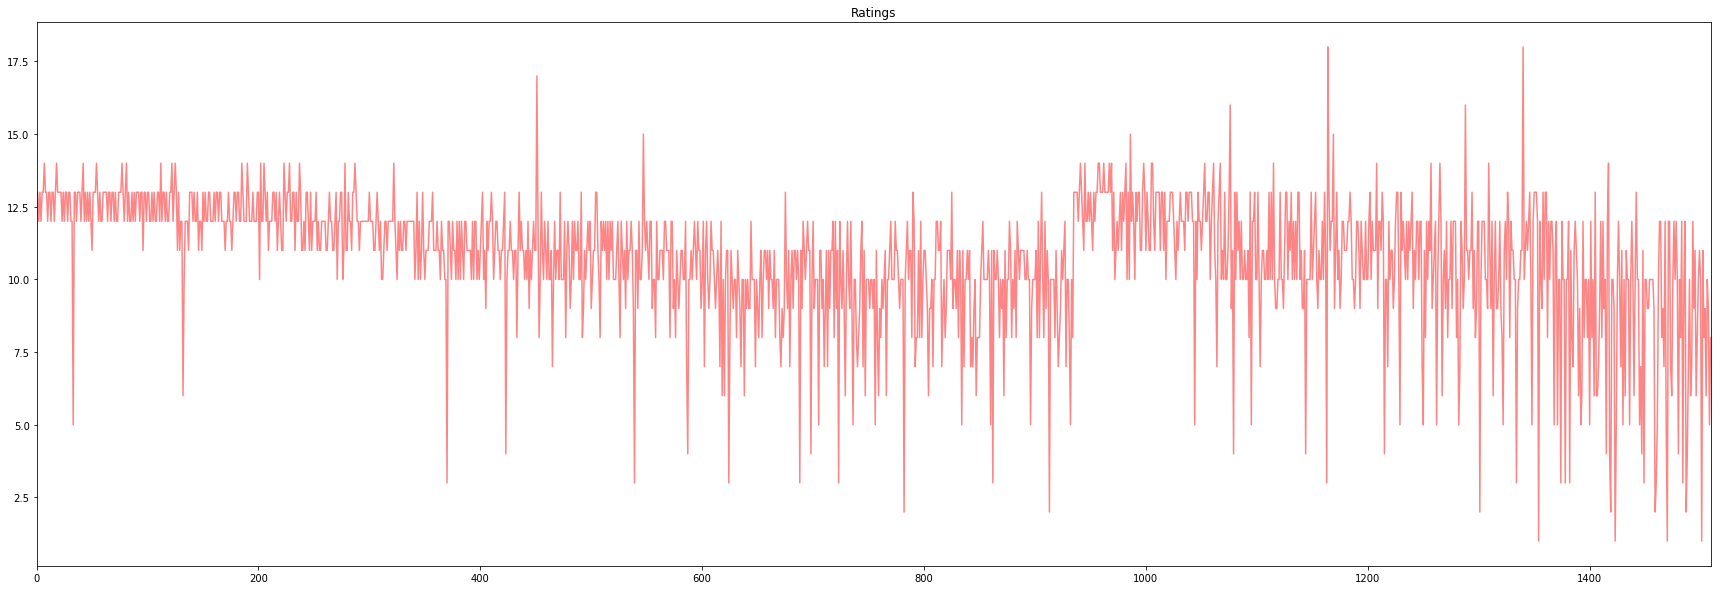

In [586]:
df1_clean_new.rating_numerator.plot( title = 'Ratings', color = '#fe8585', figsize=(30,10));

From the above visualization, even though there are a lot of variations in the line graph, it can be seen that most of the ratings for the dogs were from around 10 to 13 out of 10. :)